<a href="https://colab.research.google.com/github/aashu-0/nn-zero-to-hero/blob/main/makemore_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
words = open('/content/drive/MyDrive/makemore-nn/names.txt', 'r').read().splitlines()

In [64]:
chars = sorted(list(set(''.join(words))))   # 26 alphabets
stoi = {s:i+1 for i,s in enumerate(chars)}    # stoi => string to integers
stoi['.'] = 0                                 # considering single special char only
itos = {i:s for s,i in stoi.items()}

In [65]:
import torch

In [66]:
# create the training set of all the bigrams(x,y)
xs, ys = [], []                     # xs => inputs, ys => labels


for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1,ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [67]:
print(f'inputs: {xs}')
print(f'labels: {ys}')

inputs: tensor([ 0,  5, 13, 13,  1])
labels: tensor([ 5, 13, 13,  1,  0])


In [68]:
# difference between torch.Tensor and torch.tensor

# torch.tensor infers the dtype automatically, whereas torch.Tensor returns float dtype
# therfore use torch.tensor :P

In [69]:
# one hot encoding the input array

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()                   # type casting it to float
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [70]:
xenc.shape

torch.Size([5, 27])

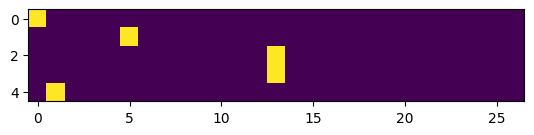

In [71]:
import matplotlib.pyplot as plt
plt.imshow(xenc)

In [72]:
xenc.dtype       # while plugging numbers into neural nets we don't want them to be integers
                 # we want them to be floating points

torch.float32

In [73]:
# weights

W = torch.randn((27,27))                 # randn gives numbers from normal distribution
xenc @ W                                # matrix multiplication  (5,27) @ (27,1)  => for one neuron

tensor([[-0.0555,  0.0429, -0.4218,  0.6101, -0.3684, -0.1366, -1.0152, -0.9019,
          0.7420, -0.0217, -0.0489, -0.6191, -0.6020,  1.1014,  0.4021, -0.4315,
          2.4259, -0.1193,  0.1331,  0.0634, -1.4446,  1.8609, -0.4070, -1.3823,
         -1.2379, -0.4688,  0.3629],
        [ 0.1954,  0.3923, -2.0068, -0.1483, -1.3904,  0.0785,  0.5249,  1.2737,
         -0.3701, -1.0550, -0.2795,  1.5128, -2.5376,  0.9070, -1.2447, -0.4247,
         -1.0011, -1.5927,  0.2279, -1.7064, -0.3240, -0.4534,  0.4569, -2.9764,
          0.1176, -0.2666,  2.0917],
        [ 0.0771, -0.6168, -0.6316,  0.2126, -2.9696,  1.0404,  0.0844, -0.0500,
          0.4307,  2.5742, -1.7874,  1.3947, -0.9202,  1.6495,  1.2421, -0.4967,
         -0.1198, -1.2327, -1.8776, -0.5693, -1.0862,  0.5555, -0.4151, -0.4208,
          0.0478, -1.0027,  1.2454],
        [ 0.0771, -0.6168, -0.6316,  0.2126, -2.9696,  1.0404,  0.0844, -0.0500,
          0.4307,  2.5742, -1.7874,  1.3947, -0.9202,  1.6495,  1.2421, -0.4967

In [74]:
logits = xenc @ W    # log-counts also called as logits
counts = logits.exp()      # equivalent to N array of counts in bigram model
probs = counts / counts.sum(1, keepdims = True)     # prob are counts normalised
probs

tensor([[0.0228, 0.0252, 0.0158, 0.0444, 0.0167, 0.0211, 0.0087, 0.0098, 0.0507,
         0.0236, 0.0230, 0.0130, 0.0132, 0.0726, 0.0361, 0.0157, 0.2730, 0.0214,
         0.0276, 0.0257, 0.0057, 0.1552, 0.0161, 0.0061, 0.0070, 0.0151, 0.0347],
        [0.0346, 0.0422, 0.0038, 0.0246, 0.0071, 0.0308, 0.0481, 0.1018, 0.0197,
         0.0099, 0.0215, 0.1293, 0.0023, 0.0706, 0.0082, 0.0186, 0.0105, 0.0058,
         0.0358, 0.0052, 0.0206, 0.0181, 0.0450, 0.0015, 0.0320, 0.0218, 0.2307],
        [0.0230, 0.0115, 0.0113, 0.0263, 0.0011, 0.0602, 0.0231, 0.0202, 0.0327,
         0.2790, 0.0036, 0.0858, 0.0085, 0.1107, 0.0736, 0.0129, 0.0189, 0.0062,
         0.0033, 0.0120, 0.0072, 0.0371, 0.0140, 0.0140, 0.0223, 0.0078, 0.0739],
        [0.0230, 0.0115, 0.0113, 0.0263, 0.0011, 0.0602, 0.0231, 0.0202, 0.0327,
         0.2790, 0.0036, 0.0858, 0.0085, 0.1107, 0.0736, 0.0129, 0.0189, 0.0062,
         0.0033, 0.0120, 0.0072, 0.0371, 0.0140, 0.0140, 0.0223, 0.0078, 0.0739],
        [0.0273, 0.0114,

In [75]:
probs[0].sum()

tensor(1.0000)

In [76]:
probs[0]

tensor([0.0228, 0.0252, 0.0158, 0.0444, 0.0167, 0.0211, 0.0087, 0.0098, 0.0507,
        0.0236, 0.0230, 0.0130, 0.0132, 0.0726, 0.0361, 0.0157, 0.2730, 0.0214,
        0.0276, 0.0257, 0.0057, 0.1552, 0.0161, 0.0061, 0.0070, 0.0151, 0.0347])

In [77]:
# for all 27 neurons
# (5,27) @ (27,27) -> (5,27)

# (xenc @ W)[3,13]                     # gives the firing rate of the 13th neuron looking at the 3rd input

In [78]:
# (xenc[3] * W[:,13]).sum()

In [79]:
# Summary =>>>>>>>>>>>>>>>>>>>

In [80]:
xs  # imputs

tensor([ 0,  5, 13, 13,  1])

In [81]:
ys  #labels

tensor([ 5, 13, 13,  1,  0])

In [82]:
# randomly initialize 27 neurons' weights each neuron recieves 27 inputs

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g)

In [83]:
xenc = F.one_hot(xs, num_classes=27).float()       # encode input to one hot representation
logits = xenc @ W    # predict log-counts
counts = logits.exp()   # counts, equivalent to N
probs = counts / counts.sum(1, keepdims = True)    # normalise these counts to get probabilities for next char

# softmax => last two lines combined are called softmax
# thsi is the forward pass

In [84]:
probs.shape

torch.Size([5, 27])

In [85]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [86]:
# summarizing how well this network works on the one word "emma"

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram
  x = xs[i].item()   # input char index
  y = ys[i].item()   # label char index

  print('----------------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probalities from the neral nets:', probs[i])
  print('label (actual next character):', y)
  p = probs[i,y]
  print('probability assigned by the neural net to be the correct charcter: ',p.item())
  logp= torch.log(p)
  print('log liklihood: ', logp.item())
  nll = -logp
  print('-ve log likelihood: ', nll.item())
  nlls[i] =nll

print('================')
print('avg -ve log likelihood, i.e. loss= ' , nlls.mean().item())

----------------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probalities from the neral nets: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the neural net to be the correct charcter:  0.01228625513613224
log liklihood:  -4.399273872375488
-ve log likelihood:  4.399273872375488
----------------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probalities from the neral nets: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the neural net to be the c

In [171]:
# ------------ Optimization ---------
# optimizing the weights W like we did in micrograd

In [172]:
xs

tensor([ 0,  5, 13, 13,  1])

In [173]:
ys

tensor([ 5, 13, 13,  1,  0])

In [174]:
# randomly initialize 27 neurons weights, each neuron recieves 27 inputs

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad= True)

In [194]:
# forward pass

xenc= F.one_hot(xs,num_classes = 27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts/ counts.sum(1, keepdims = True)
loss = - probs[torch.arange(5), ys].log().mean()

In [176]:
# probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]
#  a better way to do this in pytorch

In [177]:
# loss = - probs[torch.arange(5), ys].log().mean()  # avg negative log likelihood using vectorized form
# loss

In [195]:
loss

tensor(3.6892, grad_fn=<NegBackward0>)

In [192]:
# backward pass
W.grad = None   # setting gradient to zero
loss.backward()

In [193]:
# updating

W.data += -0.1 * W.grad

In [181]:
# set W.grad = 0 --> update W --> forward pass --> calculate loss --> set W.grad = 0 --> update W and the cycle goes on
# this is not but gradient descent algorithm

In [232]:
# *************!!!!OPTIMIZATION!!!!! from scratch***************

In [233]:
# create the dataset
xs, ys = [],[]
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi [ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

number of examples:  228146


In [234]:
# initialize the network

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [ ]:
# adding regularization term (or loss)
(W**2).mean()
 # this term tries to make all w's to be zero bcoz if w aren't zero you feel a loss
 # it's like adding a spring force or gravity force that pushes w to be zero

In [238]:
# gradient descent

for k in range(100):

  # forward pass
  xenc= F.one_hot(xs,num_classes = 27).float()
  logits = xenc @ W
  counts = logits.exp()
  probs = counts/ counts.sum(1, keepdims = True)
  loss = - probs[torch.arange(num), ys].log().mean() + 0.01*((W**2).mean())

  # backward pass
  W.grad = None   # setting gradient to zero
  loss.backward()

  # update
  W.data += -50 * W.grad   # learning rate = 0.1 => 1 => 5 => 10 => 30 => 50

print(loss.item())

2.4812512397766113


In [240]:
# finally !!!!!!!!! sample fro the 'neural-net model'

g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    # ---------
    # BEFORE:
    # p = P[ix]
    # ---------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts /counts.sum(1, keepdims = True)
    # ---------

    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix ==0:
      break
  print(''.join(out))


junide.
janasah.
p.
cfay.
a.


In [239]:
# the result is same as that in manual bigram model (refer the makemore-bigram.ipynb notebook)

